In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score as sil
import seaborn as sns

In [37]:
#importing Airline Data
airlineData=pd.read_("EastWestAirlines.xlsx",sheet_name='data')
airlineData.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### EDA

In [38]:
airlineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [39]:
airlineData.duplicated().sum()

0

In [40]:
airlineData=airlineData.rename(columns={'ID#':'ID','Award?':'Award'})

In [41]:
airlineData.head(2)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


### Data preprocessing

In [42]:
# We have seen that the Id and award is no more needed to perform clustering so we are dropping both columns
airlineData1=airlineData.drop(['ID','Award'],axis=1)
airlineData1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


### Try using two transformation methods to check how clusters forms in two different transformation


In [43]:
airline2_norm=pd.DataFrame(normalize(airlineData1),columns=airlineData1.columns)
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718
...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509


In [44]:
airline2_std=pd.DataFrame(StandardScaler().fit_transform(airlineData1),columns=airlineData1.columns)
airline2_std

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088


### Hierarchical Clustering

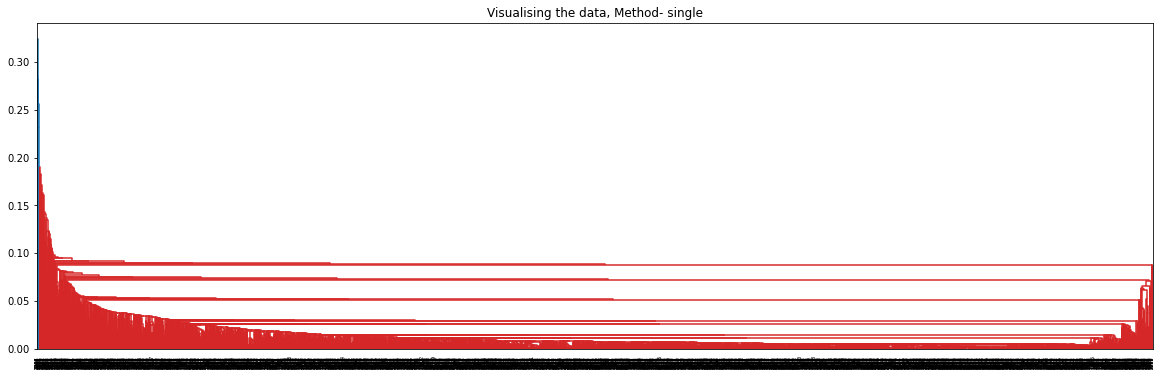

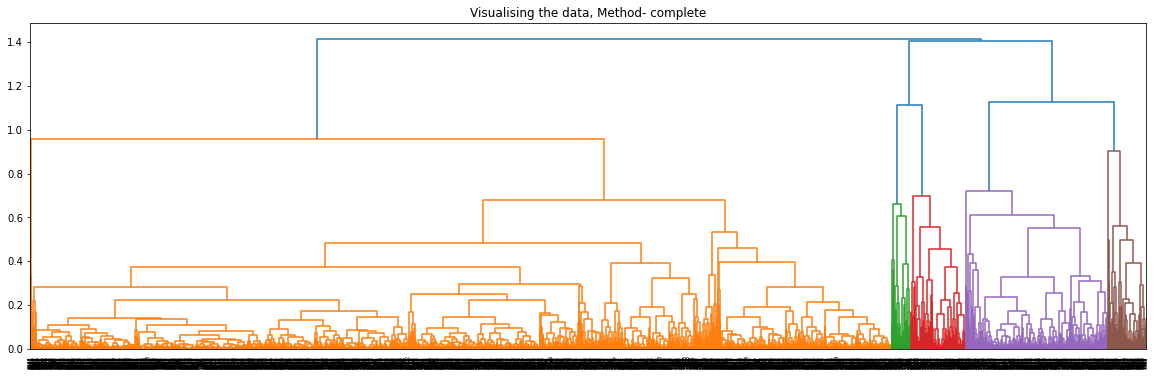

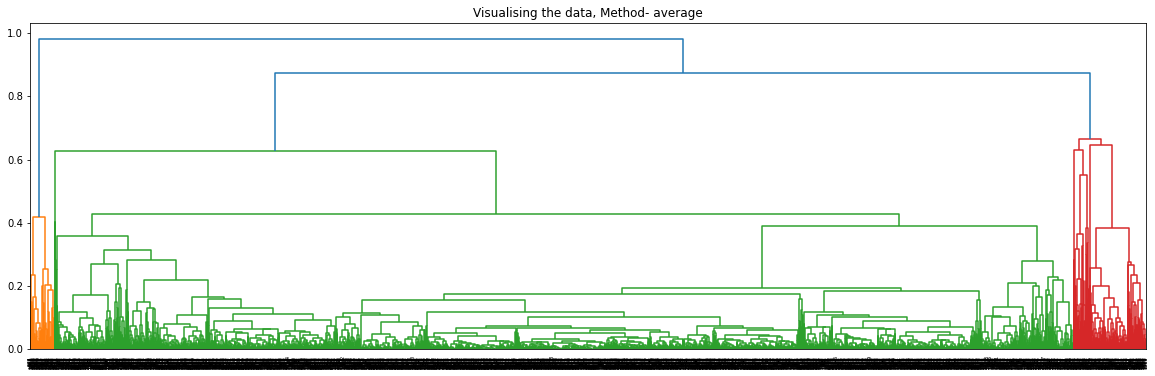

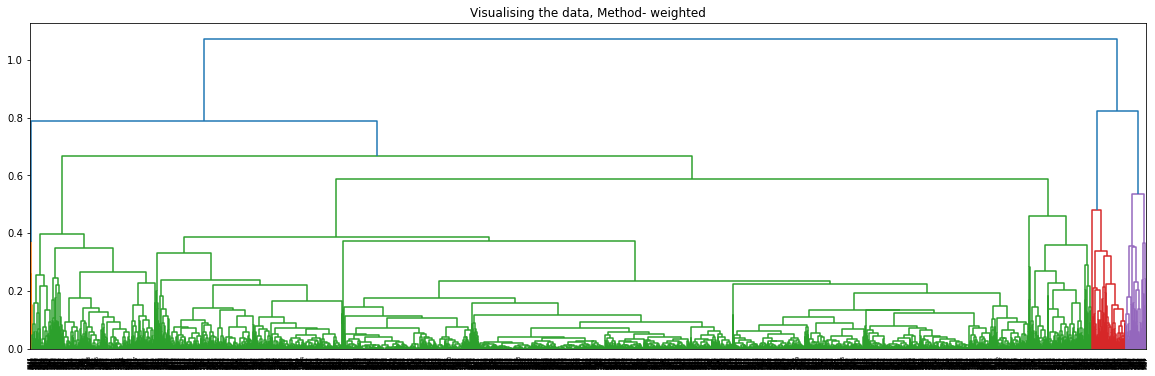

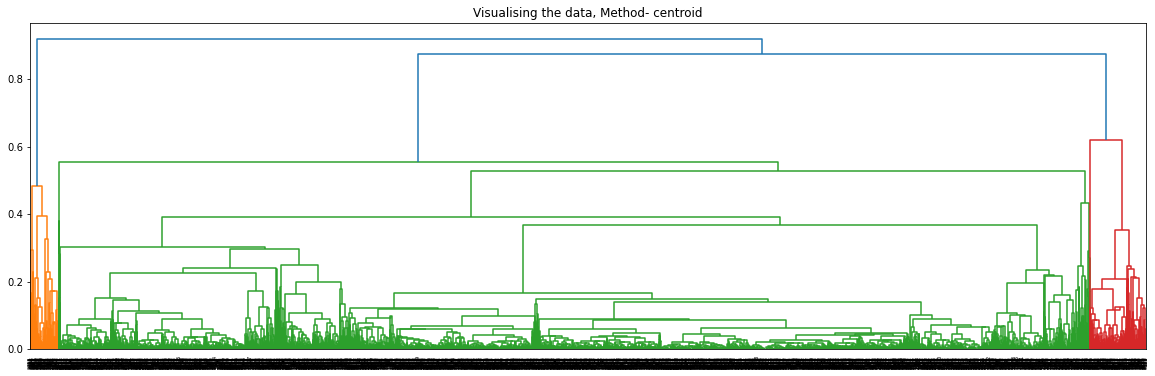

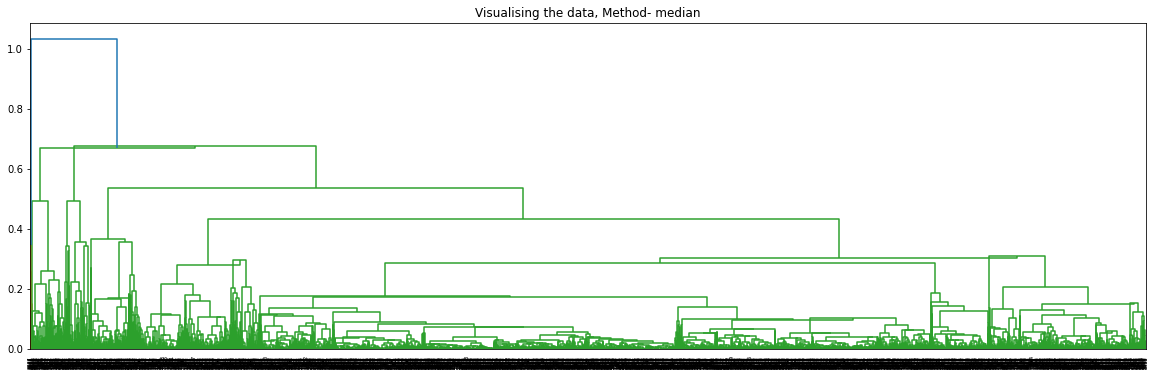

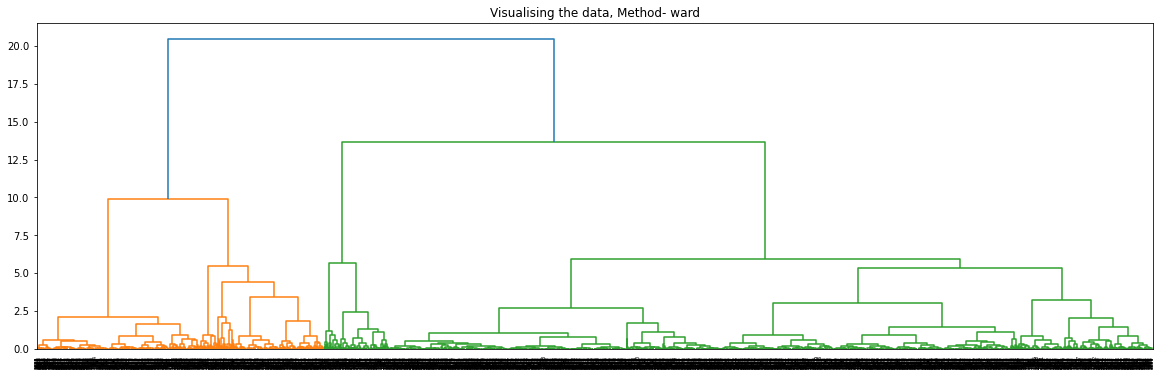

In [71]:
# Create dendrogram of normalization data for all methots 
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
     plt.figure(figsize =(20, 6))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(airline2_norm, method = methods,optimal_ordering=False))


In [46]:
nc=[2,3,4,5,6,7,8,9]

for i in nc:
    for linkages in ['ward','single','average','complete']:
        hc = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean', linkage = linkages)
        y = hc.fit_predict(airline2_norm)
        sc=sil(airline2_norm,y)
        print('Clusters = {}, linkage = {}, Sc score = {}'.format(i,linkages,sc))
    print()

Clusters = 2, linkage = ward, Sc score = 0.5139372045034354
Clusters = 2, linkage = single, Sc score = 0.6414807597188987
Clusters = 2, linkage = average, Sc score = 0.6199075368947913
Clusters = 2, linkage = complete, Sc score = 0.5414238117493092

Clusters = 3, linkage = ward, Sc score = 0.5501327870968798
Clusters = 3, linkage = single, Sc score = 0.4980808146158188
Clusters = 3, linkage = average, Sc score = 0.6023264073883706
Clusters = 3, linkage = complete, Sc score = 0.5757037645688332

Clusters = 4, linkage = ward, Sc score = 0.45392607934250745
Clusters = 4, linkage = single, Sc score = 0.45957880996099165
Clusters = 4, linkage = average, Sc score = 0.5734105133284102
Clusters = 4, linkage = complete, Sc score = 0.5322356437626531

Clusters = 5, linkage = ward, Sc score = 0.31026334777845854
Clusters = 5, linkage = single, Sc score = 0.42528433822274675
Clusters = 5, linkage = average, Sc score = 0.5687644465781913
Clusters = 5, linkage = complete, Sc score = 0.50817558014894

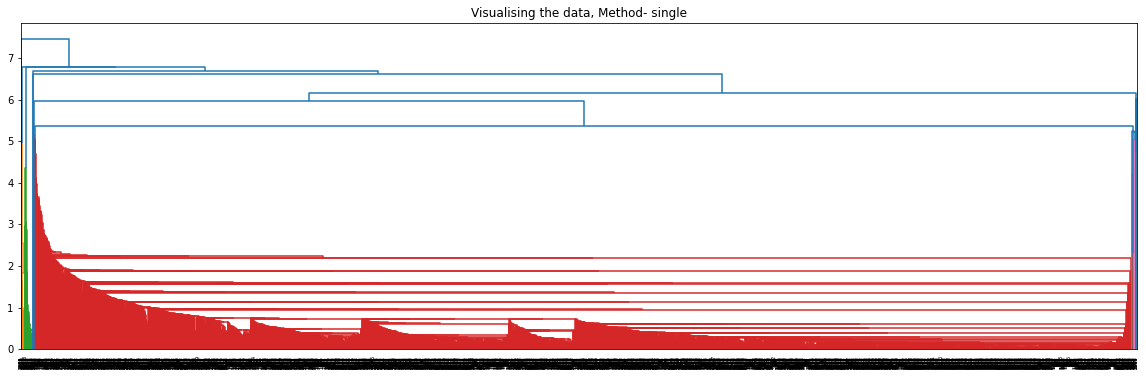

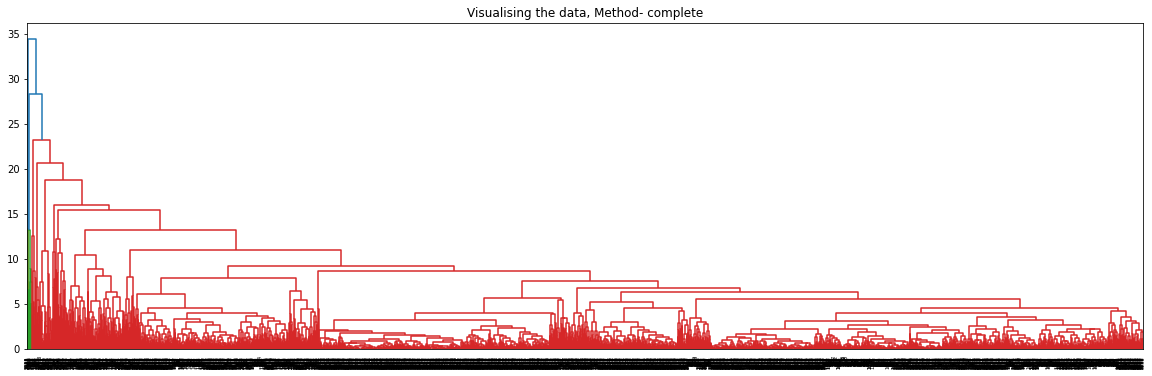

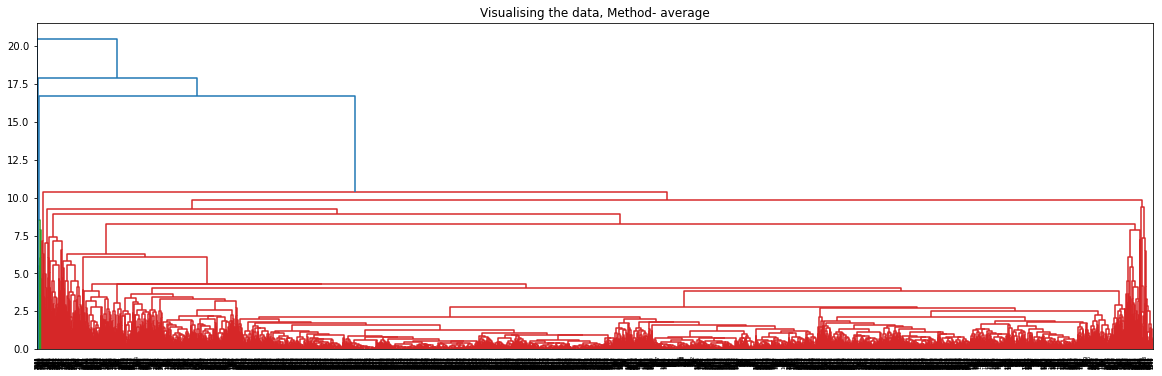

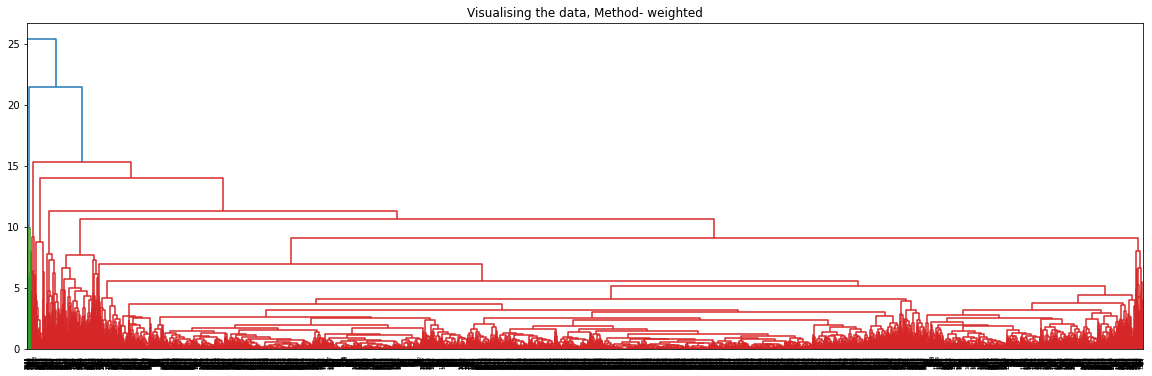

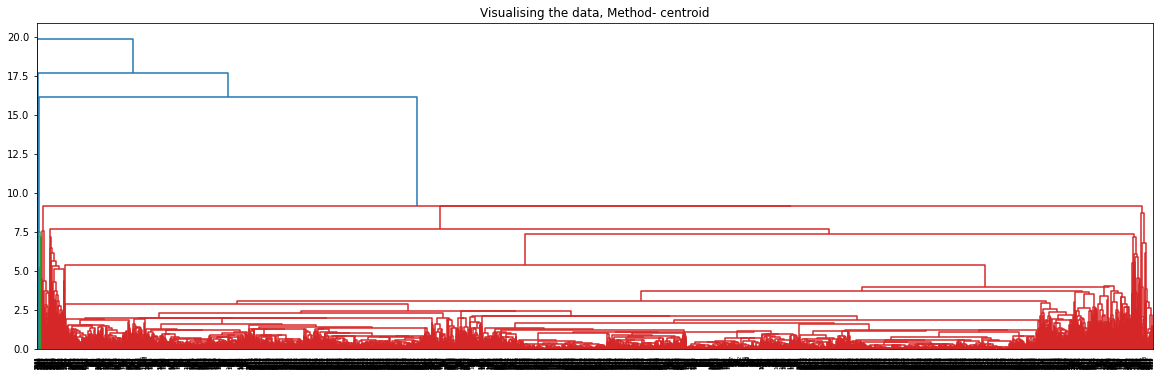

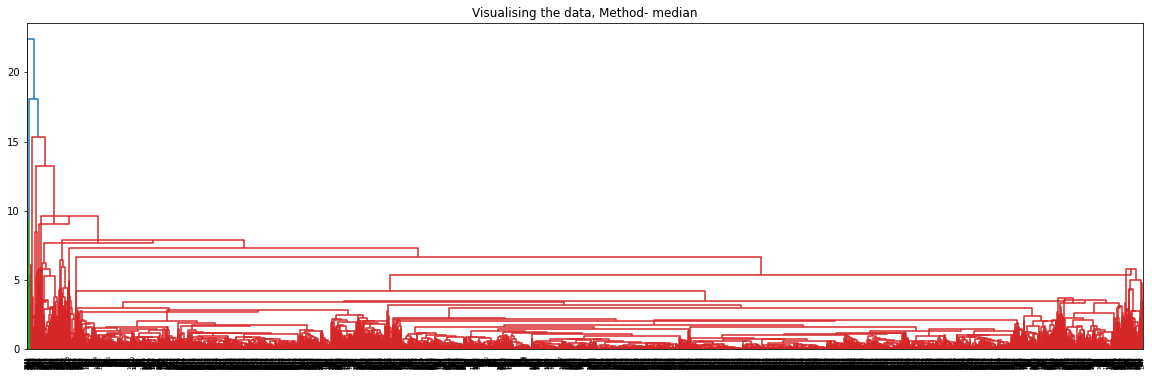

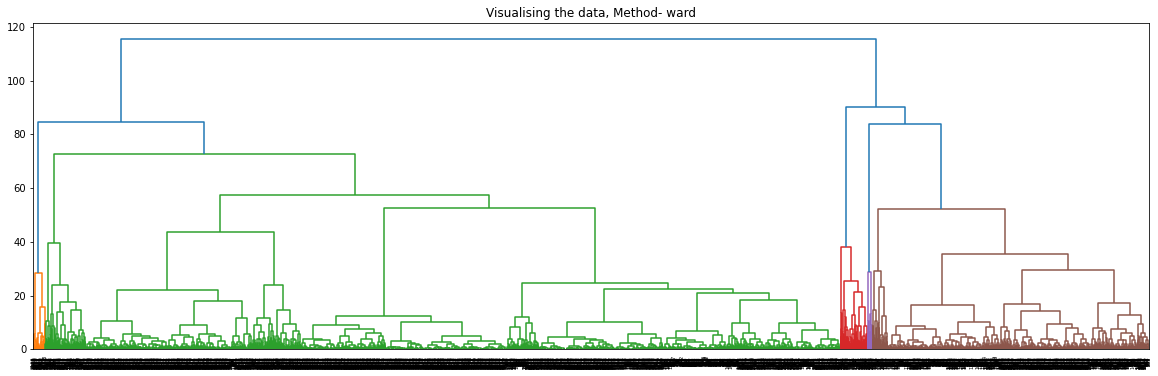

In [47]:
# Create dendrogram of Standarization data for all methots 
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
     plt.figure(figsize =(20, 6))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(airline2_std, method = methods,optimal_ordering=False))

In [48]:
nc=[2,3,4,5,6,7,8,9]

for i in nc:
    for linkages in ['ward','single','average','complete']:
        hc = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean', linkage = linkages)
        y = hc.fit_predict(airline2_std)
        sc=sil(airline2_std,y)
        print('Clusters = {}, linkage = {}, Sc score = {}'.format(i,linkages,sc))
    print()

Clusters = 2, linkage = ward, Sc score = 0.32507831694250006
Clusters = 2, linkage = single, Sc score = 0.867447784990924
Clusters = 2, linkage = average, Sc score = 0.8256575339976112
Clusters = 2, linkage = complete, Sc score = 0.8256575339976112

Clusters = 3, linkage = ward, Sc score = 0.31619409882758315
Clusters = 3, linkage = single, Sc score = 0.7558737036833013
Clusters = 3, linkage = average, Sc score = 0.8003599006619796
Clusters = 3, linkage = complete, Sc score = 0.7938964005121698

Clusters = 4, linkage = ward, Sc score = 0.3350233247024554
Clusters = 4, linkage = single, Sc score = 0.5721231743724757
Clusters = 4, linkage = average, Sc score = 0.7910117556031853
Clusters = 4, linkage = complete, Sc score = 0.665996385744917

Clusters = 5, linkage = ward, Sc score = 0.32701816589484084
Clusters = 5, linkage = single, Sc score = 0.5720046397404054
Clusters = 5, linkage = average, Sc score = 0.7879755328794891
Clusters = 5, linkage = complete, Sc score = 0.6641926233263997


In [49]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')
hclusters

AgglomerativeClustering(linkage='average', n_clusters=5)

In [50]:
y_hc=hclusters.fit_predict(airline2_std)

In [51]:
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
airlineData_hc=airlineData

In [53]:
airlineData_hc['HC_clusterID']=y_hc
airlineData_hc

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,HC_clusterID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [54]:
airlineData_hc.groupby('HC_clusterID').agg(['count']).reset_index()

,HC_clusterID,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,count,count,count,count,count,count,count,count,count,count,count,count
0,0,3979,3979,3979,3979,3979,3979,3979,3979,3979,3979,3979,3979
1,1,15,15,15,15,15,15,15,15,15,15,15,15
2,2,1,1,1,1,1,1,1,1,1,1,1,1
3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,4,1,1,1,1,1,1,1,1,1,1,1,1


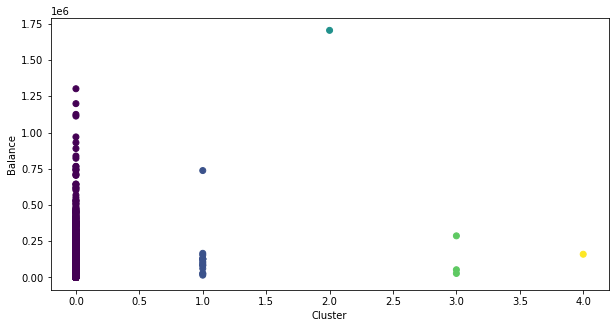

In [55]:
#plt Cluster
plt.figure(figsize=(10,5))
plt.scatter(airlineData_hc['HC_clusterID'],airlineData['Balance'],c=hclusters.labels_)
plt.xlabel('Cluster')
plt.ylabel('Balance')
plt.show()

### KMeans clustering

In [56]:
#Finding optimal number of cluster for normalize data
#using Elbow method and silhoutte method

nc=[2,3,4,5,6,7,8,9]
iner=[]
silscore =[]

for i in nc:
    Km=KMeans(i)
    Km.fit(airline2_norm)
    iner.append(Km.inertia_)

                    
for i in nc:
    hc = KMeans(n_clusters=i)
    y=hc.fit_predict(airline2_norm)
    silscore.append(sil(airline2_norm,y))



Text(0.5, 1.0, 'Silhoutte Score')

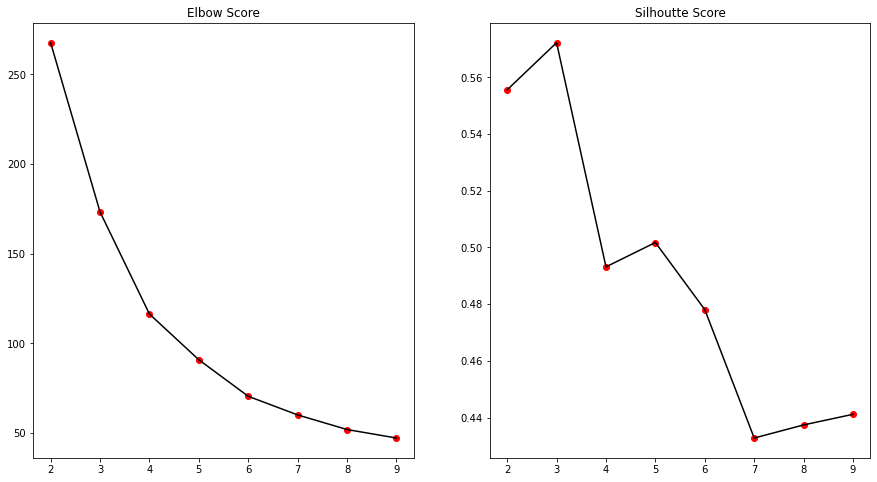

In [57]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.title('Elbow Score')
                    
plt.subplot(1,2,2)
plt.plot(nc,silscore,color="black")
plt.scatter(nc,silscore,color="red")
plt.title('Silhoutte Score')

In [58]:
#Finding optimal number of cluster for standarize data
#using Elbow method and silhoutte method

nc=[2,3,4,5,6,7,8,9]
iner=[]
silscore =[]

for i in nc:
    Km=KMeans(i)
    Km.fit(airline2_std)
    iner.append(Km.inertia_)

                    
for i in nc:
    hc = KMeans(n_clusters=i)
    y=hc.fit_predict(airline2_std)
    silscore.append(sil(airline2_std,y))


Text(0.5, 1.0, 'Silhoutte Score')

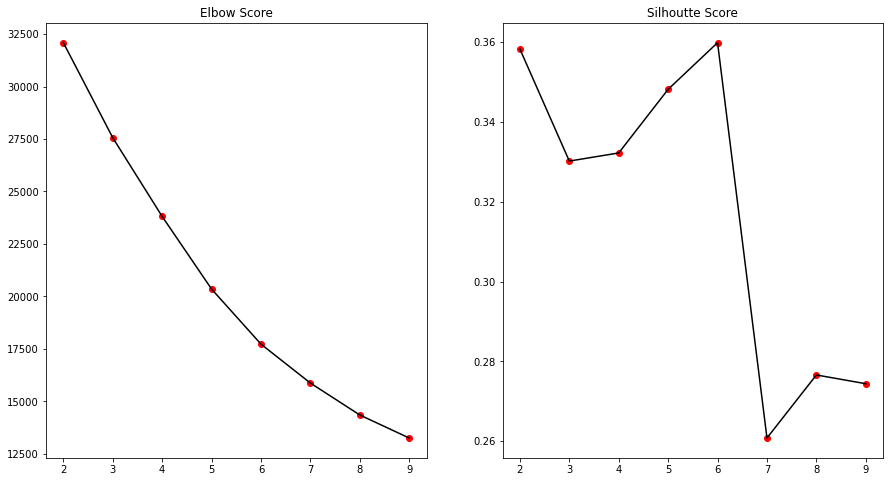

In [59]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.title('Elbow Score')
                    
plt.subplot(1,2,2)
plt.plot(nc,silscore,color="black")
plt.scatter(nc,silscore,color="red")
plt.title('Silhoutte Score')

In [60]:
#Finding optimal number of cluster for standarize data
#using Elbow method and silhoutte method

nc=[2,3,4,5,6,7,8,9]
iner=[]
silscore =[]

for i in nc:
    Km=KMeans(i)
    Km.fit(airline2_std)
    iner.append(Km.inertia_)

                    
for i in nc:
    hc = KMeans(n_clusters=i)
    y=hc.fit_predict(airline2_std)
    silscore.append(sil(airline2_std,y))


Text(0.5, 1.0, 'Silhoutte Score')

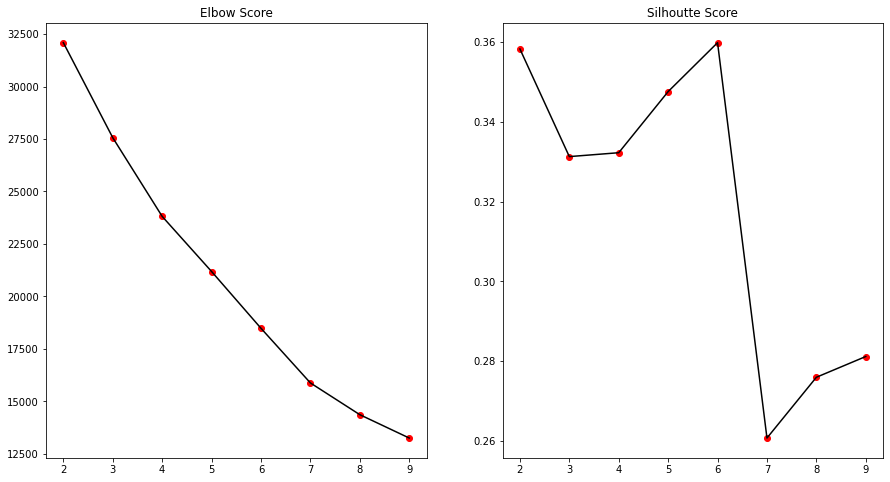

In [61]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.title('Elbow Score')
                    
plt.subplot(1,2,2)
plt.plot(nc,silscore,color="black")
plt.scatter(nc,silscore,color="red")
plt.title('Silhoutte Score')

### Conclusion:
#### By Seeing both dataset Normalization data getting high silhoutte score. The best average optimal number of cluster we are getting is 5

In [62]:
#Creating Kmeans clustering for 5 cluster
model=KMeans(5)
model.fit(airline2_norm)
model.labels_

array([1, 3, 1, ..., 2, 1, 3])

In [63]:
airlinedata_km=airlineData1
airlinedata_km['cluster id']=pd.Series(model.labels_)
airlinedata_km

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster id
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,3
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,3
4,97752,0,4,1,1,43300,26,2077,4,6935,2
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,2
3997,54899,0,1,1,1,500,1,500,1,1401,1


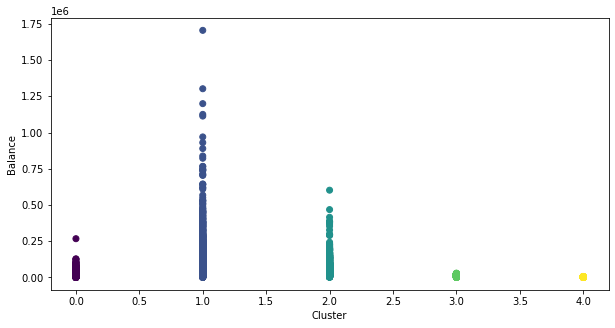

In [64]:
plt.figure(figsize=(10,5))
plt.scatter(airlinedata_km['cluster id'],airlineData['Balance'],c=model.labels_)
plt.xlabel('Cluster')
plt.ylabel('Balance')
plt.show()

In [65]:
airlinedata_km.groupby('cluster id').agg(['count']).reset_index()

,cluster id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,count,count,count,count,count,count,count,count,count,count
0,0,351,351,351,351,351,351,351,351,351,351
1,1,2158,2158,2158,2158,2158,2158,2158,2158,2158,2158
2,2,992,992,992,992,992,992,992,992,992,992
3,3,387,387,387,387,387,387,387,387,387,387
4,4,111,111,111,111,111,111,111,111,111,111


### DBSCAN

In [66]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler=MinMaxScaler()
data=scaler.fit_transform(airlineData1)
data

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.25      ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.75      ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.25      ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        0.5       ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.25      ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.75      ]])

In [68]:
dbs=DBSCAN(min_samples=5,eps=0.2)
claas_pr=dbs.fit_predict(data)
claas_pr

array([0, 1, 0, ..., 3, 0, 1], dtype=int64)

In [69]:
dbs_df=airlineData1.copy()
dbs_df['clusters']=claas_pr
dbs_df['clusters'].value_counts()

 0     1472
 1      382
 2      283
 4      271
 3      246
-1      193
 5      176
 15     169
 6      143
 8      118
 9      110
 7       87
 10      76
 14      76
 12      66
 11      62
 13      34
 18      13
 16      10
 17       6
 19       6
Name: clusters, dtype: int64

In [70]:
# Using groupby function to sort by Clusters
dbs_df.groupby(['clusters']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster id
clusters,,,,,,,,,,,
-1,208858.445596,1464.818653,2.813472,1.15544,1.253886,51029.875648,27.031088,3227.699482,9.554404,5024.569948,1.150259
0,62617.111413,142.209239,1.000000,1.00000,1.000000,3194.506114,6.127717,450.699049,1.360054,3545.914402,1.000000
1,11697.973822,13.259162,1.000000,1.00000,1.000000,957.947644,3.421466,94.680628,0.298429,4905.759162,3.000000
2,84651.028269,38.787986,4.000000,1.00000,1.000000,39319.678445,18.664311,336.402827,0.954064,4696.459364,2.000000
3,46658.434959,30.158537,3.000000,1.00000,1.000000,20206.000000,16.008130,190.329268,0.585366,3923.313008,2.000000
4,129140.232472,47.535055,3.000000,1.00000,1.000000,18164.970480,16.527675,257.232472,0.749077,4790.804428,1.000000
5,85335.147727,40.772727,2.000000,1.00000,1.000000,9430.886364,14.125000,122.045455,0.375000,4406.323864,1.000000
6,147031.790210,41.202797,5.000000,1.00000,1.000000,71001.272727,21.076923,322.293706,1.034965,5082.433566,2.000000
7,28246.287356,55.597701,4.000000,1.00000,1.000000,41139.402299,18.517241,262.735632,0.862069,4445.126437,0.000000
